In [3]:
import pandas as pd

# Load processed transaction data
df = pd.read_csv("../data/processed_data/processed_data.csv")

# Selecting only the required features.
forecasting_data = df[[
    "year", "month", "day", "weekday_num",  # Date-related features
    "mcc_freq",  # Frequency encoding for MCC
    "merchant_category_encoded",  # Encoded version of merchant_category
    "is_refund",  # Refund flag
    "per_capita_income", "yearly_income", "total_debt",  # Financial context
    "amount_log"  # Target variable (log-transformed spending amount)
]]

# Save the final dataset
forecasting_data.to_csv("../data/processed_data/forecasting_data.csv", index=False)

print("Forecasting dataset created successfully!")

Forecasting dataset created successfully!


First 5 Rows of the Dataset:


,year,month,day,weekday_num,mcc_freq,merchant_category_encoded,is_refund,per_capita_income,yearly_income,total_debt,amount_log
0,2014,11,17,0,0.037627,96,0,-0.249351,-1.615427,-0.669554,1.350496
1,2019,9,22,6,0.109791,64,1,1.368556,1.408464,-0.447318,1.689882
2,2010,5,23,6,0.018681,32,0,-0.597519,-0.441434,0.792950,1.309966
3,2012,3,19,0,0.017465,12,0,0.931636,0.997440,-1.193142,1.292704
4,2014,3,13,3,0.119690,45,0,0.439516,0.534586,0.162423,1.665724



Missing Values:
year                         0
month                        0
day                          0
weekday_num                  0
mcc_freq                     0
merchant_category_encoded    0
is_refund                    0
per_capita_income            0
yearly_income                0
total_debt                   0
amount_log                   0
dtype: int64

Data Types:
year                           int64
month                          int64
day                            int64
weekday_num                    int64
mcc_freq                     float64
merchant_category_encoded      int64
is_refund                      int64
per_capita_income            float64
yearly_income                float64
total_debt                   float64
amount_log                   float64
dtype: object

Statistical Summary:


,year,month,day,weekday_num,mcc_freq,merchant_category_encoded,is_refund,per_capita_income,yearly_income,total_debt,amount_log
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000
mean,2014.518327,6.442320,15.709187,3.001693,0.061277,58.476447,0.049540,-1.111289e-16,2.842171e-17,-2.925068e-17,1.419006
std,2.805886,3.410739,8.783798,1.998532,0.040969,28.844909,0.216993,1.000003e+00,1.000003e+00,1.000003e+00,0.340785
min,2010.000000,1.000000,1.000000,0.000000,0.000024,0.000000,0.000000,-2.572172e+00,-2.438146e+00,-1.207768e+00,0.000000
25%,2012.000000,3.000000,8.000000,1.000000,0.035727,34.000000,0.000000,-7.388124e-01,-6.957376e-01,-8.573371e-01,1.264801
50%,2015.000000,6.000000,16.000000,3.000000,0.050664,61.000000,0.000000,-2.265618e-01,-2.122563e-01,-1.059912e-01,1.519780
75%,2017.000000,9.000000,23.000000,5.000000,0.107074,87.000000,0.000000,5.519426e-01,5.428254e-01,6.033125e-01,1.663294
max,2019.000000,12.000000,31.000000,6.000000,0.119690,107.000000,1.000000,2.219384e+00,2.208510e+00,2.772522e+00,2.063486


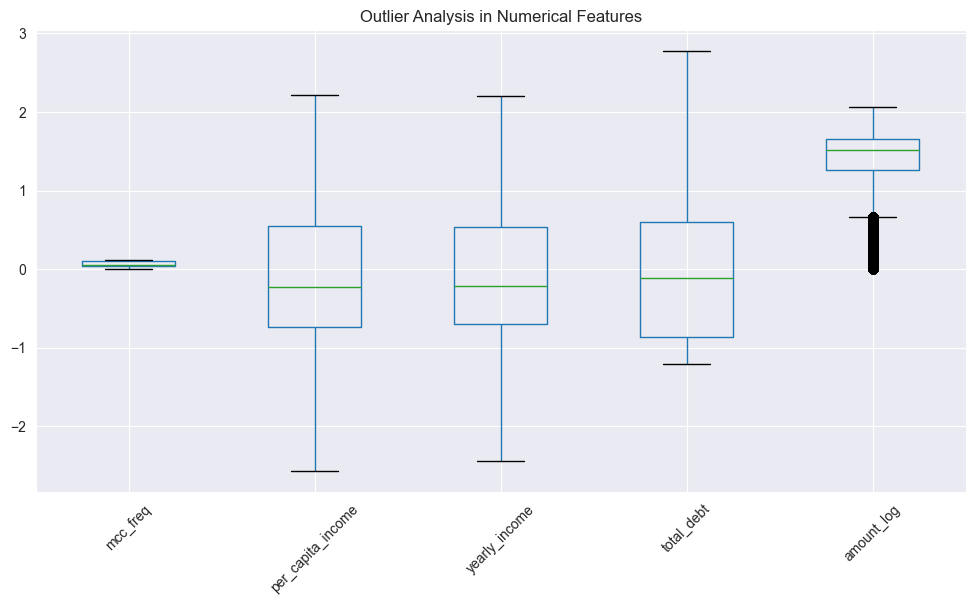

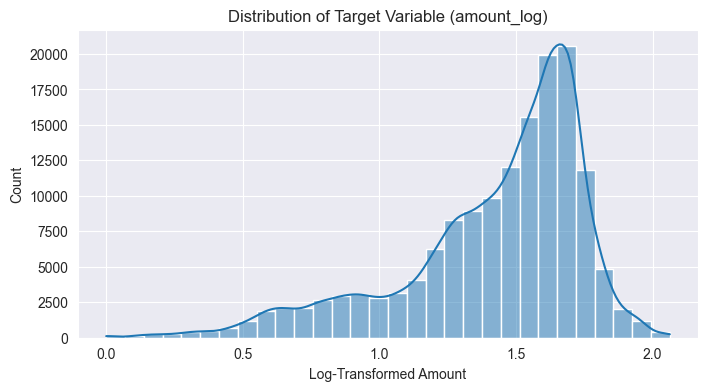

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the forecasting dataset
file_path = "../data/processed_data/forecasting_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 Rows of the Dataset:")
display(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check basic statistics
print("\nStatistical Summary:")
display(df.describe())

# Check for outliers in numerical columns
numeric_columns = ["mcc_freq", "per_capita_income", "yearly_income", "total_debt", "amount_log"]
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.title("Outlier Analysis in Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Check the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(df["amount_log"], bins=30, kde=True)
plt.title("Distribution of Target Variable (amount_log)")
plt.xlabel("Log-Transformed Amount")
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("../data/processed_data/forecasting_data.csv")

# Split features (X) and target (y)
X = df.drop(columns=["amount_log"])  # Features
y = df["amount_log"]  # Target Variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Dataset Loaded and Split Successfully!")

 Dataset Loaded and Split Successfully!


In [8]:
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load Tokenizer
with open("../data/models/tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

# Load Classification Model
classification_model = load_model("../data/models/lstm_model.h5")

def predict_merchant_category(description):
    """ Predict `merchant_category_encoded` using LSTM Classification Model """
    sequence = tokenizer.texts_to_sequences([description])
    padded_sequence = pad_sequences(sequence, maxlen=50, padding="post")

    prediction = classification_model.predict(padded_sequence)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/saiajaychilakala/AI-PersonalFinanceTracker-ML/.venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/saiajaychilakala/AI-PersonalFinanceTracker

In [9]:
from datetime import datetime
import numpy as np

def extract_date_features(date_str):
    """ Convert date string into numerical features """
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return date.year, date.month, date.day, date.weekday()

def calculate_mcc_freq(category, df):
    """ Calculate frequency of a merchant category """
    return df[df["merchant_category_encoded"] == category].shape[0] / df.shape[0]

def compute_per_capita_income(yearly_income):
    """ Compute per capita income based on yearly income """
    return yearly_income / 12

def log_transform_amount(amount):
    """ Convert amount to log scale """
    return np.log1p(amount)  # log1p to handle zero values

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(" Models Trained Successfully!")

 Models Trained Successfully!


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, X_test, y_test, model_name):
    """ Evaluate the model using MAE & RMSE """
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f" {model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Evaluate both models
evaluate_model(linear_model, X_test, y_test, "Linear Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest Regressor")

 Linear Regression Performance:
MAE: 0.2383
RMSE: 0.3108
 Random Forest Regressor Performance:
MAE: 0.1527
RMSE: 0.2291


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Train and Test Errors
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f" Random Forest Regressor Overfitting Check:")
print(f" Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f" Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

# Overfitting Condition
if test_mae > (train_mae * 1.2):
    print(" Warning: Possible Overfitting Detected!")
elif test_mae < (train_mae * 0.8):
    print(" Warning: Possible Underfitting Detected!")
else:
    print(" Model Generalizes Well!")

 Random Forest Regressor Overfitting Check:
 Train MAE: 0.0564, Test MAE: 0.1527
 Train RMSE: 0.0855, Test RMSE: 0.2291


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,  # Increase trees
    max_depth=10,  # Limit depth to avoid memorization
    min_samples_split=5,  # Increase samples required to split
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_test, y_test, model_name):
    """ Evaluate the model using MAE & RMSE """
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n{model_name} Performance After Tuning:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

evaluate_model(rf_model, X_test, y_test, "Tuned Random Forest Regressor")


Tuned Random Forest Regressor Performance After Tuning:
MAE: 0.1852
RMSE: 0.2583


In [15]:
# Train and Test Errors
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nRandom Forest Overfitting Check After Tuning:")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

# Overfitting Condition
if test_mae > (train_mae * 1.2):
    print(" Warning: Possible Overfitting Still Detected!")
elif test_mae < (train_mae * 0.8):
    print("️ Warning: Possible Underfitting Detected!")
else:
    print(" Model Generalizes Well!")


Random Forest Overfitting Check After Tuning:
Train MAE: 0.1806, Test MAE: 0.1852
Train RMSE: 0.2508, Test RMSE: 0.2583
 Model Generalizes Well!


In [16]:
import pickle

# Save the trained model
with open("../data/models/spending_forecasting_rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Tuned Random Forest Model Saved Successfully!")

Tuned Random Forest Model Saved Successfully!


In [33]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import pickle

# Load models
classification_model = load_model("../data/models/lstm_model.h5")
with open("../data/models/spending_forecasting_rf_model.pkl", "rb") as file:
    spending_model = pickle.load(file)

# Define feature column names (these must match the training data)
feature_columns = ["year", "month", "day", "weekday_num", "mcc_freq",
                   "merchant_category_encoded", "is_refund",
                   "per_capita_income", "yearly_income", "total_debt"]

def predict_spending(date, description, amount, yearly_income, total_debt):
    # Extract Date Features
    date = pd.to_datetime(date)
    year, month, day = date.year, date.month, date.day
    weekday_num = date.weekday()

    # Predict merchant category using the classification model
    sequence = tokenizer.texts_to_sequences([description])
    padded_sequence = pad_sequences(sequence, maxlen=50, padding="post")
    merchant_category_encoded = np.argmax(classification_model.predict(padded_sequence), axis=1)[0]

    # Compute derived features
    is_refund = 0  # Default assumption
    per_capita_income = yearly_income / 12  # Assuming per capita income is monthly

    # Create a feature vector as a DataFrame (Fixes missing feature names issue)
    feature_vector = pd.DataFrame([[year, month, day, weekday_num, 0,
                                    merchant_category_encoded, is_refund,
                                    per_capita_income, yearly_income, total_debt]],
                                  columns=feature_columns)

    # Predict Log-Spending Amount
    predicted_log_amount = spending_model.predict(feature_vector)[0]

    # Convert back to original scale
    predicted_amount = np.exp(predicted_log_amount)

    return predicted_amount

# Example Use Case
predicted_value = predict_spending("2025-03-20", "Uber ride home", 10, 60000, 5000)
print(f"Predicted Spending Amount: ${predicted_value:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Spending Amount: $6.71
